In [1]:
# 불필요한 경고 출력 방지
import warnings

warnings.filterwarnings("ignore")

In [2]:
# 데이터 세트 로딩
from sklearn.datasets import load_iris
iris= load_iris()

In [5]:
data = iris.data
feature_names = iris.feature_names

In [6]:
target = iris.target
target_names = iris.target_names

In [8]:
import pandas as pd

iris_df = pd.DataFrame(
        data =data,
        columns = feature_names)
iris_df['target'] = target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# 시각화

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# 꽃잎과 꽃받침을 따로따로 시각화

sepal_columns=[feature_names[0],feature_names[1]]
petal_columns = [feature_names[2],feature_names[3]]

sepal_columns, petal_columns

(['sepal length (cm)', 'sepal width (cm)'],
 ['petal length (cm)', 'petal width (cm)'])

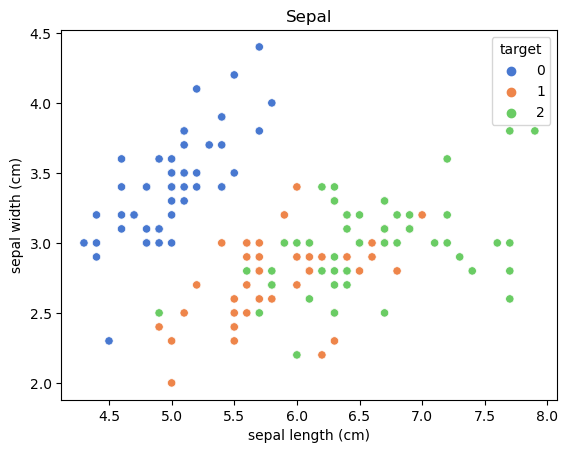

In [27]:
# 꽃받침 시각화
sns.scatterplot(
    x=sepal_columns[0],
    y=sepal_columns[1],
    hue='target',
    palette='muted',
    data=iris_df)

plt.title('Sepal')
plt.show()

# 0(setosa)는 잘 나뉠 수 있지만, 1과(versicolor) 2(virginica)는 분산이 크지 않음.
# 

In [26]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

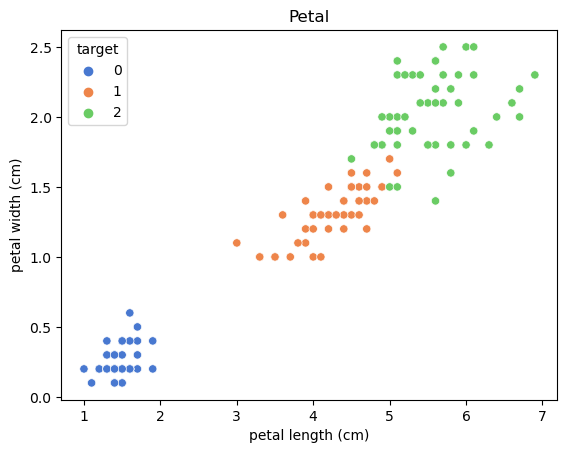

In [30]:
# 꽃잎 시각화
sns.scatterplot(
    x=petal_columns[0],
    y=petal_columns[1],
    hue='target',
    palette='muted',
    data=iris_df)

plt.title('Petal')
plt.show()

# PCA로 차원 변환

## 4차원 -> 2차원 

In [88]:
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(iris_df.iloc[:,:-1])
iris_scaled


array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [90]:
# 4차원 데이터를 2차원으로 축소
from sklearn.decomposition import PCA

# n_components: 축소할 차원, 주성분 개수, 분산이 가장 큰 벡터의 개수
# 선택된 2개의 고유벡터는 서로 직교, 서로 독립 == 기저벡터라는 말
# PCA, 고유분해로 얻어낸 벡터를 기저벡터로 씀
pca_2 = PCA(n_components=2)


# PCA 객체에 데이터 입력
pca_2.fit(iris_scaled)

# 데이터 변환 수행
iris_pca = pca_2.transform(iris_scaled)
iris_pca.shape # (150,2) --> 2차원으로 축소됨

(150, 2)

In [91]:
# PCA로 변환된 데이터를  DataFrame으로 만들기
pca_columns = ['Component 1','Component 2']
iris_pca_df = pd.DataFrame(
            iris_pca,
            columns = pca_columns
            )

iris_pca_df['target'] = target

iris_pca_df.head()

,Component 1,Component 2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


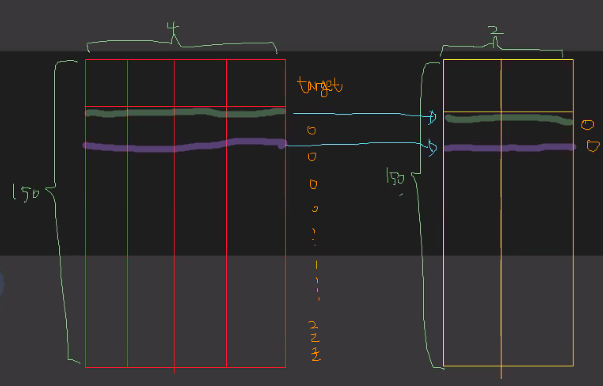

- target 그대로
- feature만 4 --> 2로 변함

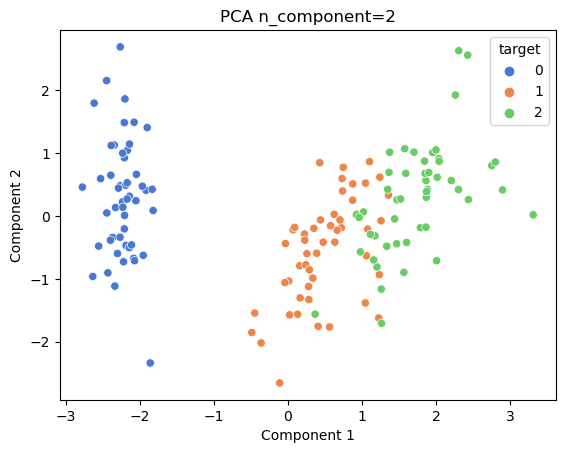

In [92]:

sns.scatterplot(
    x='Component 1',
    y='Component 2',
    hue='target',
    palette='muted',
    data=iris_pca_df)

plt.title('PCA n_component=2')
plt.show()

- pca_2 객체의 explained_variance_ratio_ 속성 확인

In [93]:
pca_2.explained_variance_ratio_

array([0.72962445, 0.22850762])

- **Component1 이 전체 변동성의 73%를,** 
- **Component2 가 전체 변동성의 22%를 차지**

--> PCA를 2개 요소로만 변환해도 전체 변동성의 95%를 설명할 수 있다는 말임

## 원본 iris_df와 PCA로 변환된 데이터세트 iris_pca_df 를 분류적용한 후 결과 비교하겠음

- 원본데이터

In [94]:
# 랜덤포레스트로 분류!

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state =  156)
score = cross_val_score(
            rcf,
            iris.data,
            iris.target,
            scoring = 'accuracy',
            cv=3)

print('원본 데이터 교차 검증 개별 정확도:', score)
print('원본 데이터 평균 정확도: ',np.mean(score
                                ))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도:  0.96


- PCA 변환된 데이터

In [95]:
iris_pca_df.iloc[:,0]

0     -2.264703
1     -2.080961
2     -2.364229
3     -2.299384
4     -2.389842
         ...   
145    1.870503
146    1.564580
147    1.521170
148    1.372788
149    0.960656
Name: Component 1, Length: 150, dtype: float64

In [99]:
score_pca = cross_val_score(
        rcf,
        iris_pca_df.iloc[:,:2],
        iris_pca_df.iloc[:,-1],
        scoring='accuracy',
        cv=3
        )

print('PCA 데이터 교차 검증 개별 정확도:', score_pca)
print('PCA 데이터 평균 정확도: ',np.mean(score_pca
                                ))

PCA 데이터 교차 검증 개별 정확도: [0.88 0.88 0.88]
PCA 데이터 평균 정확도:  0.88


## 4차원 -> 3차원

In [46]:
pca_3 = PCA(n_components=3)

iris_pca_3 = pca_3.fit_transform(iris_df.drop('target',axis=1))
iris_pca_3.shape

(150, 3)

In [48]:
pca_columns = ['Component 1','Component 2','Component 3']
iris_pca_df = pd.DataFrame(
            iris_pca_3,
            columns = pca_columns
            )

iris_pca_df['target'] = target

iris_pca_df.head()

,Component 1,Component 2,Component 3,target
0,-2.684126,0.319397,-0.027915,0
1,-2.714142,-0.177001,-0.210464,0
2,-2.888991,-0.144949,0.017900,0
3,-2.745343,-0.318299,0.031559,0
4,-2.728717,0.326755,0.090079,0


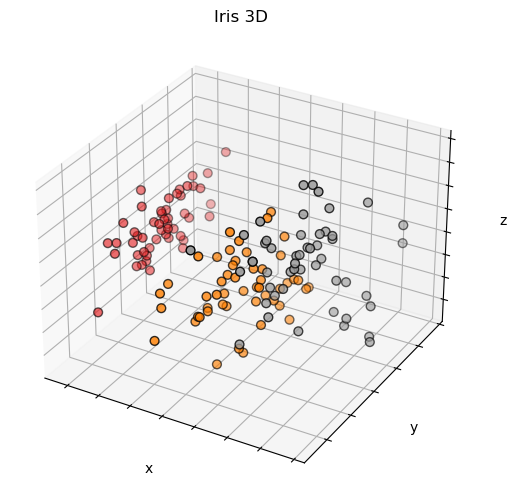

In [68]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')

ax.scatter(iris_pca_df["Component 1"], # x축 데이터
           iris_pca_df["Component 2"], # y축 데이터
           iris_pca_df["Component 3"], # z축 데이터 
           c=iris_pca_df['target'], # 3d scatter의 색깔 기준
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("Iris 3D")
ax.set_xlabel("x")
ax.w_xaxis.set_ticklabels([]) # x축 tick 사용하지 않기
ax.set_ylabel("y")
ax.w_yaxis.set_ticklabels([]) # y축 tick 사용하지 않기
ax.set_zlabel("z")
ax.w_zaxis.set_ticklabels([]) # z축 tick 사용하지 않기

plt.show()

- 4차원부터는 시각화 불가